###Topic : Customer Segmentation using RFM Analysis

#### 1. Data Preprocessing :

In [ ]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
pio.templates.default = "plotly_white"

In [ ]:
#Importing the dataset into the dataframe
df = pd.read_csv('data.csv', encoding='ISO-8859-1')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [ ]:
#Handling the missing values
df = df.dropna(subset=['CustomerID'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
#Changing the data-type of InvoiceDate to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%m/%d/%Y %H:%M')
df['InvoiceDate1'] = df['InvoiceDate']
df['InvoiceDate1'] = pd.to_datetime(df['InvoiceDate'])

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDate1
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01 08:26:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01 08:26:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01 08:26:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01 08:26:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01 08:26:00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   InvoiceNo     406829 non-null  object        
 1   StockCode     406829 non-null  object        
 2   Description   406829 non-null  object        
 3   Quantity      406829 non-null  int64         
 4   InvoiceDate   406829 non-null  datetime64[ns]
 5   UnitPrice     406829 non-null  float64       
 6   CustomerID    406829 non-null  float64       
 7   Country       406829 non-null  object        
 8   InvoiceDate1  406829 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(2), int64(1), object(4)
memory usage: 31.0+ MB


In [ ]:
df['InvoiceNo'].value_counts()

InvoiceNo
576339    542
579196    533
580727    529
578270    442
573576    435
         ... 
554155      1
570248      1
545414      1
545418      1
565192      1
Name: count, Length: 22190, dtype: int64

In [ ]:
df['CustomerID'].value_counts()

CustomerID
17841.0    7983
14911.0    5903
14096.0    5128
12748.0    4642
14606.0    2782
           ... 
15070.0       1
15753.0       1
17065.0       1
16881.0       1
16995.0       1
Name: count, Length: 4372, dtype: int64

In [ ]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID,InvoiceDate1
count,406829.000000,406829,406829.000000,406829.000000,406829
mean,12.061303,2011-07-10 16:30:57.879207424,3.460471,15287.690570,2011-07-10 16:30:57.879207424
min,-80995.000000,2010-12-01 08:26:00,0.000000,12346.000000,2010-12-01 08:26:00
25%,2.000000,2011-04-06 15:02:00,1.250000,13953.000000,2011-04-06 15:02:00
50%,5.000000,2011-07-31 11:48:00,1.950000,15152.000000,2011-07-31 11:48:00
75%,12.000000,2011-10-20 13:06:00,3.750000,16791.000000,2011-10-20 13:06:00
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000,2011-12-09 12:50:00
std,248.693370,NaN,69.315162,1713.600303,NaN


In [ ]:
#Observations
#1. There are rows where the Quantity is negative, we need to remove those.
#2. There are rows where the unit price is 0.

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDate1
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01 08:26:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01 08:26:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01 08:26:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01 08:26:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01 08:26:00


In [ ]:
df = df[df['UnitPrice']>0]

In [ ]:
df = df[df['Quantity']>0]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397884 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   InvoiceNo     397884 non-null  object        
 1   StockCode     397884 non-null  object        
 2   Description   397884 non-null  object        
 3   Quantity      397884 non-null  int64         
 4   InvoiceDate   397884 non-null  datetime64[ns]
 5   UnitPrice     397884 non-null  float64       
 6   CustomerID    397884 non-null  float64       
 7   Country       397884 non-null  object        
 8   InvoiceDate1  397884 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(2), int64(1), object(4)
memory usage: 30.4+ MB


In [ ]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID,InvoiceDate1
count,397884.000000,397884,397884.000000,397884.000000,397884
mean,12.988238,2011-07-10 23:41:23.511023360,3.116488,15294.423453,2011-07-10 23:41:23.511023360
min,1.000000,2010-12-01 08:26:00,0.001000,12346.000000,2010-12-01 08:26:00
25%,2.000000,2011-04-07 11:12:00,1.250000,13969.000000,2011-04-07 11:12:00
50%,6.000000,2011-07-31 14:39:00,1.950000,15159.000000,2011-07-31 14:39:00
75%,12.000000,2011-10-20 14:33:00,3.750000,16795.000000,2011-10-20 14:33:00
max,80995.000000,2011-12-09 12:50:00,8142.750000,18287.000000,2011-12-09 12:50:00
std,179.331775,NaN,22.097877,1713.141560,NaN


In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDate1
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01 08:26:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01 08:26:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01 08:26:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01 08:26:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01 08:26:00


In [ ]:
df['EffectivePrice'] = df['Quantity']*df['UnitPrice']

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDate1,EffectivePrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01 08:26:00,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01 08:26:00,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,20.34


#### 2. RFM Calculation:

In [ ]:
#Calculating the RFM metrics for each customer
day = df['InvoiceDate'].max()

print(day)
#df['Date']=pd.to_datetime(df['Date'])
#Recency (R) : How recently a customer made a purchase
recency = df.groupby(["CustomerID"]).agg({"InvoiceDate":lambda x:((day-x.max()).days)})

2011-12-09 12:50:00


In [ ]:
recency

,InvoiceDate
CustomerID,
12346.0,325
12347.0,1
12348.0,74
12349.0,18
12350.0,309
...,...
18280.0,277
18281.0,180
18282.0,7


In [ ]:
#Frequency (F) : How often a customer makes a purchase
frequency = df.drop_duplicates(subset='InvoiceNo').groupby(['CustomerID'])[['InvoiceNo']].count()

In [ ]:
frequency

,InvoiceNo
CustomerID,
12346.0,1
12347.0,7
12348.0,4
12349.0,1
12350.0,1
...,...
18280.0,1
18281.0,1
18282.0,2


In [ ]:
#Monetary (M) : The total monetary value of a customer's purchases
money = df.groupby(["CustomerID"])[["EffectivePrice"]].sum()

In [ ]:
money

,EffectivePrice
CustomerID,
12346.0,77183.60
12347.0,4310.00
12348.0,1797.24
12349.0,1757.55
12350.0,334.40
...,...
18280.0,180.60
18281.0,80.82
18282.0,178.05


#### 3. RFM Segmentation:

In [ ]:
#Assigning RFM scores to each customer based on their quartiles
recency.columns = ['Recency']
frequency.columns = ['Frequency']
money.columns = ['Money']

#Combining the RFM scores to create a single RFM score for each customer
RFM = pd.concat([recency,frequency,money],axis=1)

In [ ]:
RFM.head()

,Recency,Frequency,Money
CustomerID,,,
12346.0,325,1,77183.60
12347.0,1,7,4310.00
12348.0,74,4,1797.24
12349.0,18,1,1757.55
12350.0,309,1,334.40


#### 4. Customer Segmentation:

In [ ]:
# Define scoring criteria for each RFM value
recency_scores = [5, 4, 3, 2, 1]  # Higher score for lower recency (more recent)
frequency_scores = [1, 2, 3, 4, 5]  # Higher score for higher frequency
monetary_scores = [1, 2, 3, 4, 5]  # Higher score for higher monetary value

#Calculating RFM scores
RFM['RecencyScore'] = pd.cut(RFM['Recency'], bins=5, labels=recency_scores)
RFM['FrequencyScore'] = pd.cut(RFM['Frequency'], bins=5, labels=frequency_scores)
RFM['MonetaryScore'] = pd.cut(RFM['Money'], bins=5, labels=monetary_scores)
RFM.head()

,Recency,Frequency,Money,RecencyScore,FrequencyScore,MonetaryScore
CustomerID,,,,,,
12346.0,325,1,77183.60,1,1,2
12347.0,1,7,4310.00,5,1,1
12348.0,74,4,1797.24,5,1,1
12349.0,18,1,1757.55,5,1,1
12350.0,309,1,334.40,1,1,1


In [ ]:
#Converting the type of data to int and adding it all to give the RFM Score
RFM['RFMScore'] = RFM['RecencyScore'].astype(int)+RFM['FrequencyScore'].astype(int)+RFM['MonetaryScore'].astype(int)
RFM.head()

,Recency,Frequency,Money,RecencyScore,FrequencyScore,MonetaryScore,RFMScore
CustomerID,,,,,,,
12346.0,325,1,77183.60,1,1,2,4
12347.0,1,7,4310.00,5,1,1,7
12348.0,74,4,1797.24,5,1,1,7
12349.0,18,1,1757.55,5,1,1,7
12350.0,309,1,334.40,1,1,1,3


In [ ]:
#Counting the number of customers fall in each RFM score
RFM['RFMScore'].value_counts()

RFMScore
7     2669
6      600
5      415
4      359
3      267
8       12
9        7
10       4
11       2
12       2
13       1
Name: count, dtype: int64

In [ ]:
# Create RFM segments based on the RFM score
segment_labels = ['Low-Value', 'Mid-Value', 'High-Value']
RFM['Value Segment'] = pd.qcut(RFM['RFMScore'], q=3, labels=segment_labels)
RFM.head()

,Recency,Frequency,Money,RecencyScore,FrequencyScore,MonetaryScore,RFMScore,Value Segment
CustomerID,,,,,,,,
12346.0,325,1,77183.60,1,1,2,4,Low-Value
12347.0,1,7,4310.00,5,1,1,7,Mid-Value
12348.0,74,4,1797.24,5,1,1,7,Mid-Value
12349.0,18,1,1757.55,5,1,1,7,Mid-Value
12350.0,309,1,334.40,1,1,1,3,Low-Value


In [ ]:
#Analysing the High-value client
RFM[RFM['Value Segment']=='High-Value']

,Recency,Frequency,Money,RecencyScore,FrequencyScore,MonetaryScore,RFMScore,Value Segment
CustomerID,,,,,,,,
12415.0,23,21,124914.53,5,1,3,9,High-Value
12748.0,0,209,33719.73,5,5,1,11,High-Value
12971.0,3,86,11189.91,5,3,1,9,High-Value
13089.0,2,97,58825.83,5,3,2,10,High-Value
13408.0,1,62,28117.04,5,2,1,8,High-Value
13694.0,3,50,65039.62,5,2,2,9,High-Value
13798.0,0,57,37153.85,5,2,1,8,High-Value
14096.0,3,17,65164.79,5,1,2,8,High-Value
14156.0,9,55,117379.63,5,2,3,10,High-Value


In [ ]:
#Creating a new dataframe referencing it to the existing dataframe
RFM2 = RFM[['Recency','Frequency','Money']]
RFM2.head()

,Recency,Frequency,Money
CustomerID,,,
12346.0,325,1,77183.60
12347.0,1,7,4310.00
12348.0,74,4,1797.24
12349.0,18,1,1757.55
12350.0,309,1,334.40


In [ ]:
#Clustering technique (K Means) to segment customers
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
scaled = scalar.fit_transform(RFM2)

/Users/sharvarideshpande/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/sharvarideshpande/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/sharvarideshpande/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/sharvarideshpande/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: 

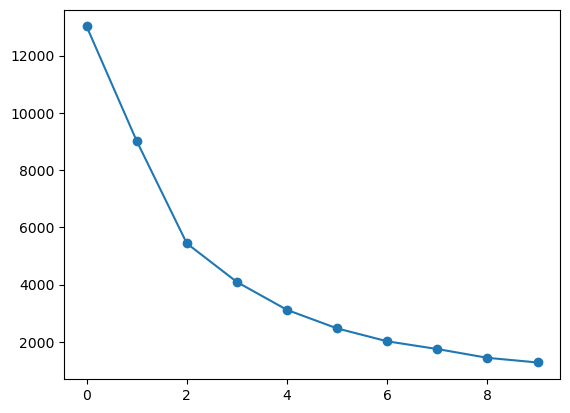

In [ ]:
from sklearn.cluster import KMeans
inertia = []
for i in np.arange(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(scaled)
    inertia.append(kmeans.inertia_)

plt.plot(inertia,marker='o')

In [ ]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(scaled)
RFM2['Clusters'] = kmeans.labels_+1

/Users/sharvarideshpande/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/m2/b6scf0t57t9bl1tlfzg270980000gn/T/ipykernel_70692/3425250251.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RFM2['Clusters'] = kmeans.labels_+1


In [ ]:
RFM2['Clusters'].value_counts()

Clusters
1    3230
2    1082
3      26
Name: count, dtype: int64

In [ ]:
RFM2.head()

,Recency,Frequency,Money,Clusters
CustomerID,,,,
12346.0,325,1,77183.60,2
12347.0,1,7,4310.00,1
12348.0,74,4,1797.24,1
12349.0,18,1,1757.55,1
12350.0,309,1,334.40,2


In [ ]:
#Calculating the mean of Recency, Frequency, Money and grouping it
group = RFM2.groupby('Clusters')[['Recency', 'Frequency', 'Money']].mean()
group

,Recency,Frequency,Money
Clusters,,,
1,40.454180,4.672755,1855.942345
2,246.106285,1.582255,631.424206
3,5.038462,66.423077,85904.351538


#### 5. Segment Profiling:

In [ ]:
# RFM Segment Distribution
segment_counts = RFM['Value Segment'].value_counts().reset_index()
segment_counts.columns = ['Value Segment', 'Count']

Text(0.5, 1.0, 'RFM Value segment distribution')

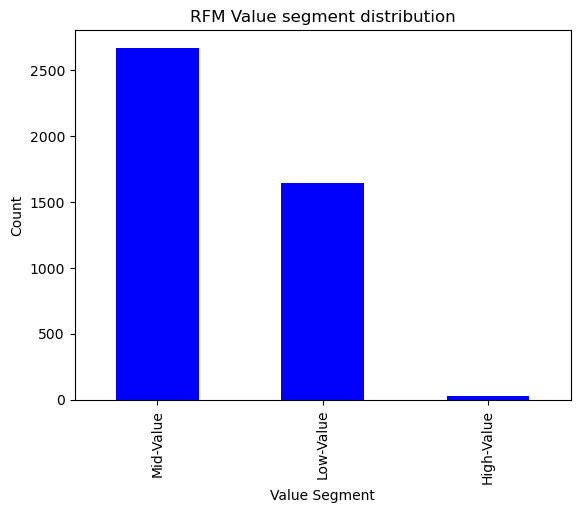

In [ ]:
# Plotting the bar graph using Pandas
segment_counts.plot.bar(x='Value Segment', y='Count', color='blue', legend=False)

# Adding labels and title
plt.xlabel('Value Segment')
plt.ylabel('Count')
plt.title('RFM Value segment distribution')

In [ ]:
high_value_client = RFM[RFM['Value Segment']=='High-Value']

In [ ]:
high_value_client

,Recency,Frequency,Money,RecencyScore,FrequencyScore,MonetaryScore,RFMScore,Value Segment
CustomerID,,,,,,,,
12415.0,23,21,124914.53,5,1,3,9,High-Value
12748.0,0,209,33719.73,5,5,1,11,High-Value
12971.0,3,86,11189.91,5,3,1,9,High-Value
13089.0,2,97,58825.83,5,3,2,10,High-Value
13408.0,1,62,28117.04,5,2,1,8,High-Value
13694.0,3,50,65039.62,5,2,2,9,High-Value
13798.0,0,57,37153.85,5,2,1,8,High-Value
14096.0,3,17,65164.79,5,1,2,8,High-Value
14156.0,9,55,117379.63,5,2,3,10,High-Value


In [ ]:
high_value_client.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28 entries, 12415.0 to 18102.0
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Recency         28 non-null     int64   
 1   Frequency       28 non-null     int64   
 2   Money           28 non-null     float64 
 3   RecencyScore    28 non-null     category
 4   FrequencyScore  28 non-null     category
 5   MonetaryScore   28 non-null     category
 6   RFMScore        28 non-null     int64   
 7   Value Segment   28 non-null     category
dtypes: category(4), float64(1), int64(3)
memory usage: 2.0 KB


In [ ]:
high_value_client['RecencyScore'] = high_value_client['RecencyScore'].astype(int)
high_value_client['FrequencyScore'] = high_value_client['FrequencyScore'].astype(int)
high_value_client['MonetaryScore'] = high_value_client['MonetaryScore'].astype(int)

/var/folders/m2/b6scf0t57t9bl1tlfzg270980000gn/T/ipykernel_70692/2778324511.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_value_client['RecencyScore'] = high_value_client['RecencyScore'].astype(int)
/var/folders/m2/b6scf0t57t9bl1tlfzg270980000gn/T/ipykernel_70692/2778324511.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_value_client['FrequencyScore'] = high_value_client['FrequencyScore'].astype(int)
/var/folders/m2/b6scf0t57t9bl1tlfzg270980000gn/T/ipykernel_70692/2778324511.py:3: Settin

#### 6. Marketing Recommendations:

In [ ]:
# Apply K-Means clustering with the chosen K
kmeans = KMeans(n_clusters=4, random_state=0)
RFM2['Cluster'] = kmeans.fit_predict(RFM2)

# Analyze and interpret the clusters
cluster_centers = kmeans.cluster_centers_
cluster_sizes = RFM2['Cluster'].value_counts()
cluster_sizes

/Users/sharvarideshpande/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/m2/b6scf0t57t9bl1tlfzg270980000gn/T/ipykernel_70692/2119363219.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RFM2['Cluster'] = kmeans.fit_predict(RFM2)


Cluster
0    4300
2      31
1       5
3       2
Name: count, dtype: int64

In [ ]:
# Analyze and profile each customer segment
from sklearn.cluster import KMeans

# Create a KMeans instance with the desired number of clusters (e.g., 3)
kmeans = KMeans(n_clusters=3)

# Fit the KMeans model to your data (RFM2 in this case)
kmeans.fit(RFM2)

# Get cluster labels for each data point
labels = kmeans.labels_

# Iterate over the clusters and analyze each one
for cluster_label in range(kmeans.n_clusters):
    cluster_data = RFM2[labels == cluster_label]

    print(f"\n\n------ Profile for Cluster {cluster_label} ------")

    # General statistics
    print("Cluster Size:", len(cluster_data))

    # RFM scores
    print("Recency:")
    print(" - Mean:", cluster_data['Recency'].mean())
    print(" - Min:", cluster_data['Recency'].min())
    print(" - Max:", cluster_data['Recency'].max())

    print("\nFrequency:")
    print(" - Mean:", cluster_data['Frequency'].mean())
    print(" - Min:", cluster_data['Frequency'].min())
    print(" - Max:", cluster_data['Frequency'].max())

    print("\nMonetary Value:")
    print(" - Mean:", cluster_data['Money'].mean())
    print(" - Min:", cluster_data['Money'].min())
    print(" - Max:", cluster_data['Money'].max())



------ Profile for Cluster 0 ------
Cluster Size: 4303
Recency:
 - Mean: 92.06112014873344
 - Min: 0
 - Max: 373

Frequency:
 - Mean: 3.9102951429235415
 - Min: 1
 - Max: 93

Monetary Value:
 - Mean: 1455.6592247269346
 - Min: 3.75
 - Max: 26879.04


------ Profile for Cluster 1 ------
Cluster Size: 5
Recency:
 - Mean: 1.6
 - Min: 0
 - Max: 7

Frequency:
 - Mean: 76.4
 - Min: 2
 - Max: 201

Monetary Value:
 - Mean: 209342.33400000003
 - Min: 143825.06
 - Max: 280206.02


------ Profile for Cluster 2 ------
Cluster Size: 30
Recency:
 - Mean: 31.266666666666666
 - Min: 0
 - Max: 325

Frequency:
 - Mean: 44.13333333333333
 - Min: 1
 - Max: 209

Monetary Value:
 - Mean: 53366.486333333334
 - Min: 28117.04
 - Max: 124914.53


/Users/sharvarideshpande/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Low-Value Segment:

1.Re-Engagement Campaigns: Use targeted campaigns with discounts to encourage repeat purchases.

2.Incentivize Spending: Offer loyalty programs or limited-time offers to boost spending.

3.Educational Content: Share product benefits and features to increase engagement.

Mid-Value Segment:

1.Exclusive Offers: Reward loyalty with exclusive discounts and perks.

2.Cross-Selling: Recommend complementary products to increase transaction value.

3.Personalized Communications: Use customer data for personalized content.

High-Value Segment:

1.VIP Programs: Create exclusive VIP programs for top customers.

2.Personal Account Management: Assign dedicated account managers.

3.Premium Content: Offer exclusive content and events for high-value customers.

Cross-Segment Strategies:

1.Gather Feedback: Implement surveys to understand customer preferences.

2.Omnichannel Approach: Ensure a consistent brand experience across all channels.

Measurement and Analysis:

1.Monitor KPIs: Track customer lifetime value, churn rate, and repeat purchase rate.

2.Iterate Based on Data: Analyze customer data and adjust strategies accordingly.

These strategies aim to enhance customer retention and revenue for businesses of all sizes. Continuous analysis and adaptation are key to long-term success.

#### 7. Visualization:

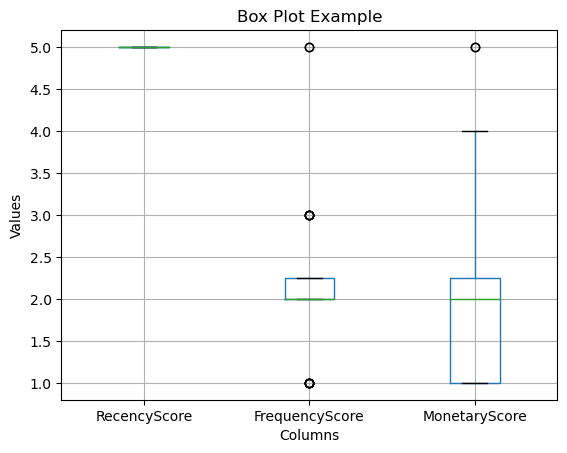

In [ ]:
# Create a box plot using Pandas
high_value_client.boxplot(column=['RecencyScore', 'FrequencyScore', 'MonetaryScore'])

# Adding labels and title
plt.xlabel('Columns')
plt.ylabel('Values')
plt.title('Box Plot Example')

# Display the plot
plt.show()

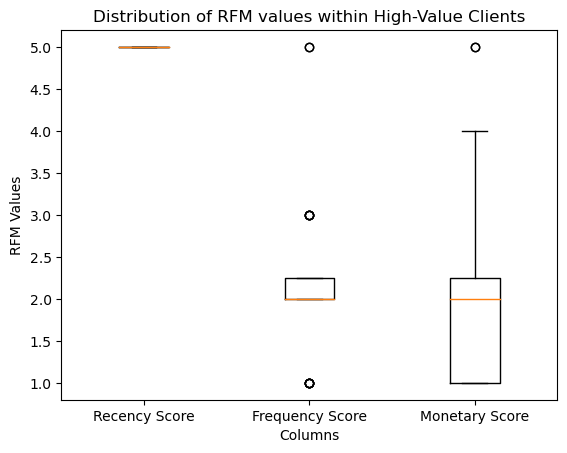

In [ ]:
# Create a box plot using Matplotlib
plt.boxplot([high_value_client['RecencyScore'], high_value_client['FrequencyScore'], high_value_client['MonetaryScore']], labels=['Recency Score', 'Frequency Score', 'Monetary Score'])

# Adding labels and title
plt.xlabel('Columns')
plt.ylabel('RFM Values')
plt.title('Distribution of RFM values within High-Value Clients')

# Display the plot
plt.show()

## Find the solutions to these questions-

### 1. Data Overview

1.1 : What is the size of the dataset in terms of the number of rows and columns?

Ans: The dataset contains 541909 rows and 8 columns before data preprocessing.

1.2 : Can you provide a brief description of each column in the dataset?

Ans:

InvoiceNo: Invoice number for each transaction.

StockCode: Code identifying the product.

Description: Description of the product.

Quantity: Quantity of the product purchased.

InvoiceDate: Date and time of the transaction.

UnitPrice: Price per unit of the product.

CustomerID: ID of the customer.

Country: Country where the transaction took place.

1.3 What is the time period covered by this dataset?

In [ ]:
# Find the earliest and latest dates
earliest_date = df['InvoiceDate'].min()
latest_date = df['InvoiceDate'].max()

# Calculate the time period
time_period = latest_date - earliest_date

# Display the time period
print("Earliest Date:", earliest_date)
print("Latest Date:", latest_date)
print("Time Period Covered:", time_period)

Earliest Date: 2010-12-01 08:26:00
Latest Date: 2011-12-09 12:50:00
Time Period Covered: 373 days 04:24:00


### 2. Customer Analysis

2.1 How many unique customers are there in the dataset?

In [ ]:
unique_customers = df['CustomerID'].nunique()
print("Number of unique customers:", unique_customers)

Number of unique customers: 4338


2.2 What is the distribution of the number of orders per customer?

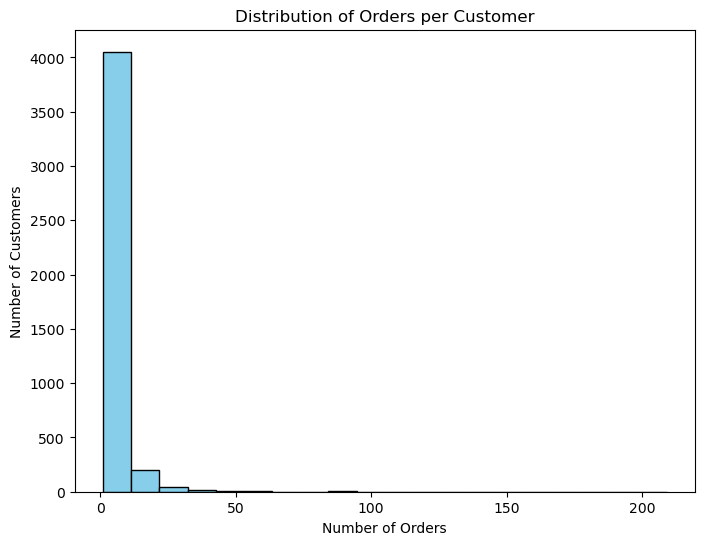

In [ ]:
# Group orders by 'CustomerID' and count the number of unique orders per customer
orders_per_customer = df.groupby('CustomerID')['InvoiceNo'].nunique()

# Visualize the disribution of orders per customer
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.hist(orders_per_customer, bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Number of Orders')
plt.ylabel('Number of Customers')
plt.title('Distribution of Orders per Customer')
plt.show()

2.3 Can you identify the top 5 customers who have made the most purchases by order count?

In [ ]:
# Group orders by 'CustomerID' and count the number of unique orders per customer
orders_per_customer = df.groupby('CustomerID')['InvoiceNo'].nunique()

# Sort customers by the number of orders in descending order
top_customers = orders_per_customer.sort_values(ascending=False).head(5)

# Display the top 5 customers with the most purchases by order count
print("Top 5 Customers with the Most Purchases by Order Count:")
print(top_customers)

Top 5 Customers with the Most Purchases by Order Count:
CustomerID
12748.0    209
14911.0    201
17841.0    124
13089.0     97
14606.0     93
Name: InvoiceNo, dtype: int64


### 3. Product Analysis

3.1 What are the top 10 most frequently purchased products?

In [ ]:
# Group products by 'StockCode' and sum the quantity to get total purchases
frequent_products = df.groupby('Description')['Quantity'].sum()

# Sort products by total quantity purchased in descending order
top_10_products = frequent_products.sort_values(ascending=False).head(10)

# Create a DataFrame with StockCode and corresponding quantities
top_10_products_df = pd.DataFrame({'StockCode': top_10_products.index, 'TotalQuantity': top_10_products.values})

# Display the top 10 most frequently purchased products with quantities
print("Top 10 Most Frequently Purchased Products:")
print(top_10_products_df)

Top 10 Most Frequently Purchased Products:
                            StockCode  TotalQuantity
0         PAPER CRAFT , LITTLE BIRDIE          80995
1      MEDIUM CERAMIC TOP STORAGE JAR          77916
2   WORLD WAR 2 GLIDERS ASSTD DESIGNS          54415
3             JUMBO BAG RED RETROSPOT          46181
4  WHITE HANGING HEART T-LIGHT HOLDER          36725
5       ASSORTED COLOUR BIRD ORNAMENT          35362
6     PACK OF 72 RETROSPOT CAKE CASES          33693
7                      POPCORN HOLDER          30931
8                  RABBIT NIGHT LIGHT          27202
9             MINI PAINT SET VINTAGE           26076


3.2 What is the average price of products in the dataset?

In [ ]:
# Calculate the average price of products in the dataset
average_price = df['UnitPrice'].mean()

# Display the average price
print("Average price of products:", average_price)

Average price of products: 3.11648775522514


3.3 Can you find out which product category generates the highest revenue?

In [ ]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

# Grouping by product category (Description or StockCode) to find total revenue
category_revenue = df.groupby('Description')['TotalPrice'].sum().sort_values(ascending=False)
print(category_revenue.head(1))  # Displaying the category generating the highest revenue

Description
PAPER CRAFT , LITTLE BIRDIE    168469.6
Name: TotalPrice, dtype: float64


### 4. Time Analysis

4.1 Is there a specific day of the week or time of day when most orders are placed?

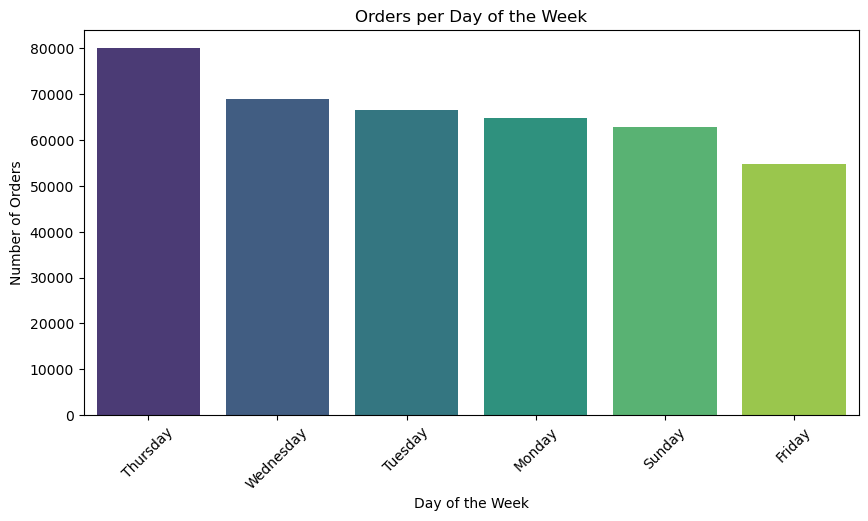

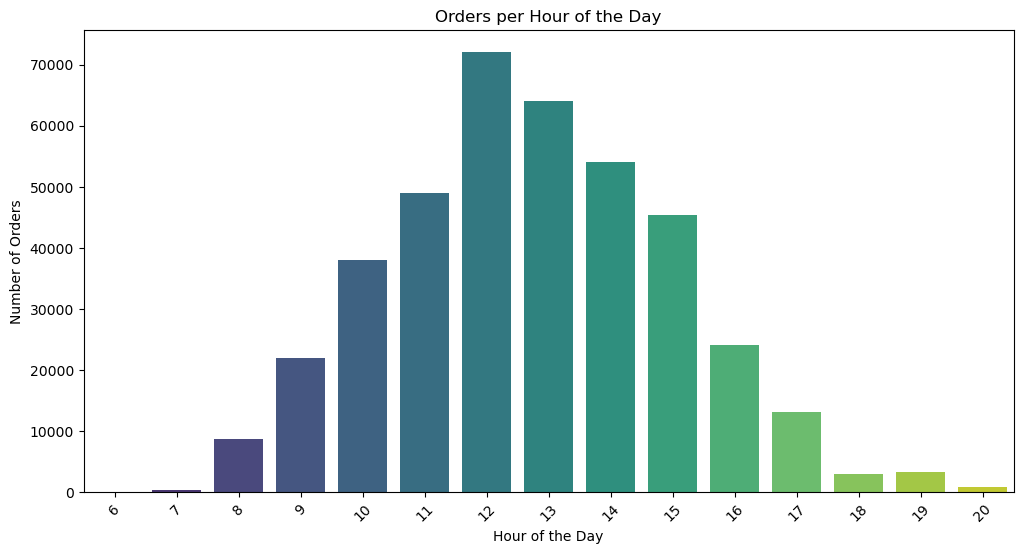

In [ ]:
# Extract day of the week and hour
df['DayOfWeek'] = df['InvoiceDate'].dt.day_name()
df['HourOfDay'] = df['InvoiceDate'].dt.hour

# Count of orders per day of the week
orders_per_day = df['DayOfWeek'].value_counts()

# Count of orders per hour of the day
orders_per_hour = df['HourOfDay'].value_counts()

# Plotting the orders per day of the week
plt.figure(figsize=(10, 5))
sns.barplot(x=orders_per_day.index, y=orders_per_day.values, palette='viridis')
plt.title('Orders per Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()

# Plotting the orders per hour of the day
plt.figure(figsize=(12, 6))
sns.barplot(x=orders_per_hour.index, y=orders_per_hour.values, palette='viridis')
plt.title('Orders per Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()

4.2 What is the average order processing time?

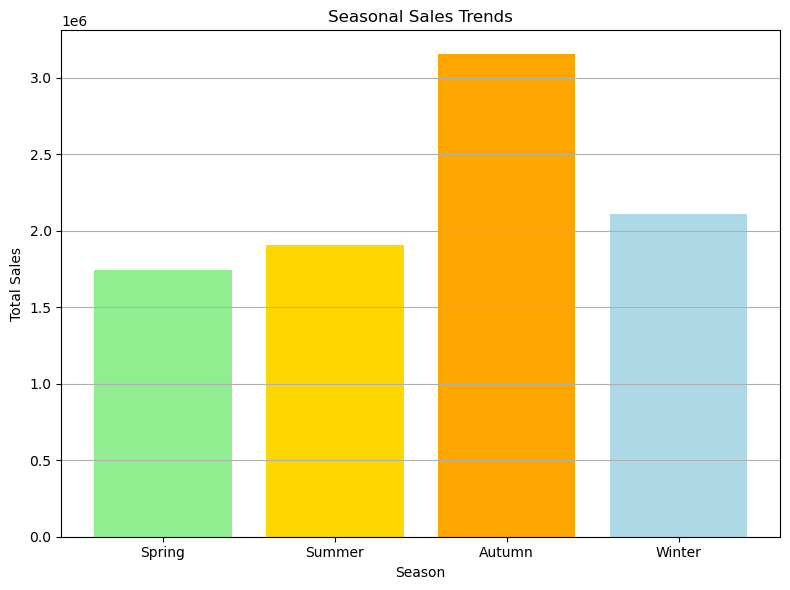

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' contains your dataset with 'InvoiceDate' and 'TotalPrice' columns

# Extracting month from 'InvoiceDate'
df['Month'] = df['InvoiceDate'].dt.month

# Mapping months to seasons
seasons = {
    1: 'Winter', 2: 'Winter', 3: 'Spring',
    4: 'Spring', 5: 'Spring', 6: 'Summer',
    7: 'Summer', 8: 'Summer', 9: 'Autumn',
    10: 'Autumn', 11: 'Autumn', 12: 'Winter'
}

# Assigning seasons based on months
df['Season'] = df['Month'].map(seasons)

# Grouping by season to analyze seasonal trends
seasonal_sales = df.groupby('Season')['TotalPrice'].sum()

# Plotting the seasonal trends using a bar chart
plt.figure(figsize=(8, 6))
seasonal_sales = seasonal_sales.reindex(['Spring', 'Summer', 'Autumn', 'Winter'])  # Reordering seasons
plt.bar(seasonal_sales.index, seasonal_sales.values, color=['lightgreen', 'gold', 'orange', 'lightblue'])
plt.title('Seasonal Sales Trends')
plt.xlabel('Season')
plt.ylabel('Total Sales')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

4.3 Are there any seasonal trends in the dataset?

In [ ]:
# Extracting month from 'InvoiceDate'
df['Month'] = df['InvoiceDate'].dt.month

# Grouping by month to analyze seasonal trends
monthly_sales = df.groupby('Month')['TotalPrice'].sum()
print(monthly_sales)
# Visualize this data to identify any seasonal patterns
# For example, using a line plot or bar chart to see sales variations across months.

Month
1      569445.040
2      447137.350
3      595500.760
4      469200.361
5      678594.560
6      661213.690
7      600091.011
8      645343.900
9      952838.382
10    1039318.790
11    1161817.380
12    1090906.680
Name: TotalPrice, dtype: float64


### 5. Geographical Analysis

5.1 Can you determine the top 5 countries with the highest number of orders?

In [ ]:
top_countries = df['Country'].value_counts().head(5)
print(top_countries)

United Kingdom    354321
Germany             9040
France              8341
EIRE                7236
Spain               2484
Name: Country, dtype: int64


5.2 Is there a correlation between the country of the customer and the average order
value?

In [ ]:
#Assuming 'df' is your DataFrame with columns: 'CustomerID', 'Country', 'Quantity', 'UnitPrice'

# Create a new column for total order value
df['TotalOrderValue'] = df['Quantity'] * df['UnitPrice']

# Grouping by country to find the total order value for each country
country_order_values = df.groupby('Country')['TotalOrderValue'].sum()

# Calculate the total number of orders per country
orders_per_country = df.groupby('Country')['InvoiceNo'].nunique()

# Calculate the average order value per country
average_order_value = country_order_values / orders_per_country

# Display the average order value for each country
print(average_order_value)

Country
Australia               2430.198421
Austria                  599.922353
Bahrain                  274.200000
Belgium                  420.370816
Brazil                  1143.600000
Canada                   611.063333
Channel Islands          786.555385
Cyprus                   849.398750
Czech Republic           413.370000
Denmark                 1053.074444
EIRE                    1021.330385
European Community       325.062500
Finland                  549.904390
France                   537.336889
Germany                  500.803370
Greece                   952.104000
Iceland                  615.714286
Israel                  1444.338000
Italy                    460.085263
Japan                   1969.282632
Lebanon                 1693.880000
Lithuania                415.265000
Malta                    545.118000
Netherlands             3036.663191
Norway                  1004.595556
Poland                   386.034211
Portugal                 586.664737
RSA                 

### 6. Payment Analysis

In [ ]:
#Adding a column for Payment Methods
import random
weights_ran=[]
for weight in range(6):
    weights_ran.append(random.randint(0,10))
print(weights_ran)
payment_methods=["Credit/Debit cards","Digital Wallets","Bank Transfer","Cash on Delivery","Mobile Payments","Buy now, Pay Later"]
df['Payment Method'] = pd.Series(random.choices(payment_methods, weights=weights_ran, k=len(df)), index=df.index)
df

[4, 5, 1, 5, 9, 4]


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDate1,EffectivePrice,TotalPrice,DayOfWeek,HourOfDay,Month,Season,TotalOrderValue,Payment Method
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01 08:26:00,15.30,15.30,Wednesday,8,12,Winter,15.30,Credit/Debit cards
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,20.34,20.34,Wednesday,8,12,Winter,20.34,Digital Wallets
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01 08:26:00,22.00,22.00,Wednesday,8,12,Winter,22.00,Digital Wallets
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,20.34,20.34,Wednesday,8,12,Winter,20.34,Cash on Delivery
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,20.34,20.34,Wednesday,8,12,Winter,20.34,Mobile Payments
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,2011-12-09 12:50:00,10.20,10.20,Friday,12,12,Winter,10.20,Credit/Debit cards
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011-12-09 12:50:00,12.60,12.60,Friday,12,12,Winter,12.60,Credit/Debit cards
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-09 12:50:00,16.60,16.60,Friday,12,12,Winter,16.60,"Buy now, Pay Later"
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-09 12:50:00,16.60,16.60,Friday,12,12,Winter,16.60,"Buy now, Pay Later"


6.1 What are the most common payment methods used by customers?

Text(0.5, 1.0, 'Payment Methods for Orders Placed')

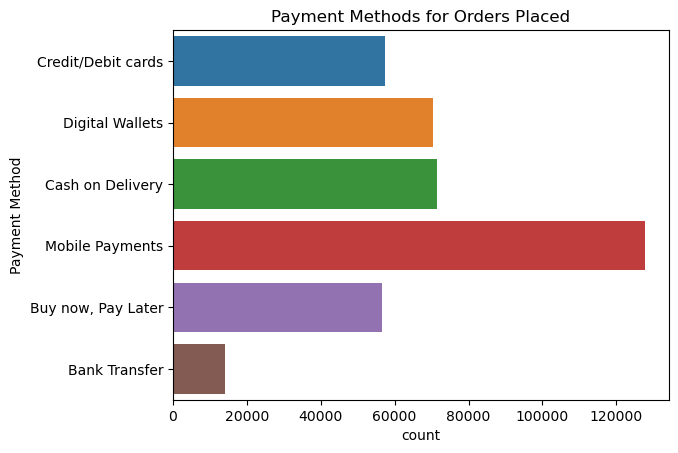

In [ ]:
sns.countplot(data=df, y='Payment Method')
plt.title('Payment Methods for Orders Placed')

6.2 Is there a relationship between the payment method and the order amount?

<Figure size 1800x600 with 0 Axes>

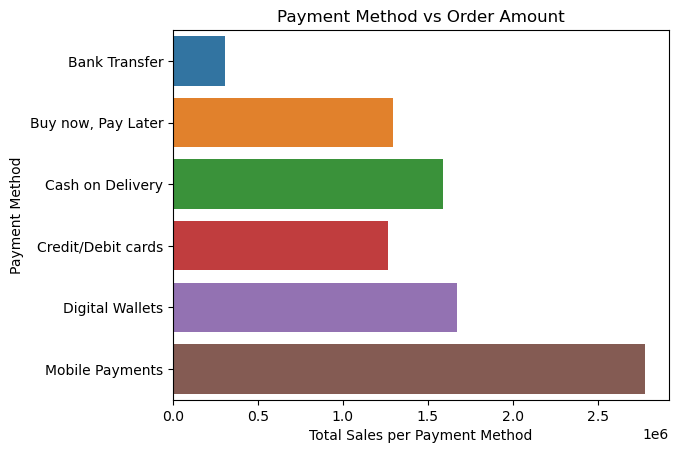

In [ ]:
payment_df = df.groupby('Payment Method')['TotalPrice'].sum().reset_index(name='Total Sales per Payment Method')
plt.figure(figsize=(18, 6))
fig, ax = plt.subplots()
sns.barplot(data=payment_df, y='Payment Method', x='Total Sales per Payment Method')
plt.title('Payment Method vs Order Amount')
plt.show()

### 7. Customer Behavior

7.1 How long, on average, do customers remain active (between their first and last purchase)?

Average duration of customer activity: 130.4485938220378


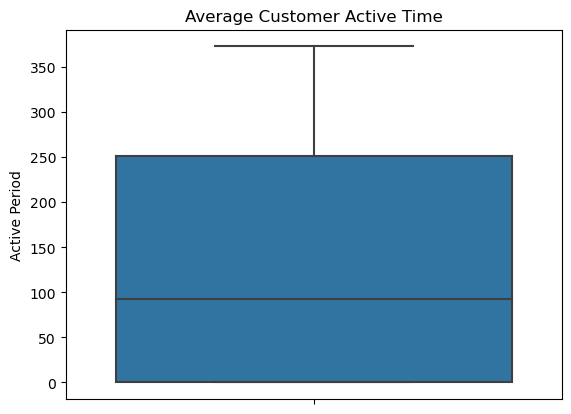

In [ ]:
customer_activity_duration = df.groupby('CustomerID')['InvoiceDate'].apply(lambda x: x.max() - x.min()).reset_index()
customer_activity_duration.columns=["CustomerID","Active Period"]
customer_activity_duration["Active Period"] = customer_activity_duration["Active Period"].dt.days
average_duration = customer_activity_duration["Active Period"].mean()
print(f"Average duration of customer activity: {average_duration}")
sns.boxplot(data=customer_activity_duration,y="Active Period")
plt.title("Average Customer Active Time")
plt.show()

7.2 Are there any customer segments based on their purchase behavior?

In [ ]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
customer_activity = df.groupby('CustomerID')['InvoiceDate'].agg(['min', 'max'])

#average duration of customer activity
customer_activity['ActivityDuration'] = (customer_activity['max'] - customer_activity['min']).dt.days.mean()

print(f'Average Duration of Customer Activity: {customer_activity["ActivityDuration"].mean()} days')

#recency and frequency
recency = (customer_activity['max'].max() - customer_activity['max']).dt.days
frequency = df['CustomerID'].value_counts()
customer_segments = pd.DataFrame({'Recency': recency, 'Frequency': frequency})

# segment thresholds
recency_threshold = customer_segments['Recency'].median()
frequency_threshold = customer_segments['Frequency'].median()

# Assign segments
customer_segments['Segment'] = 'Low Activity'
customer_segments.loc[(customer_segments['Recency'] <= recency_threshold) & (customer_segments['Frequency'] > frequency_threshold), 'Segment'] = 'High Activity'

print('Customer Segments:')
print(customer_segments)

Average Duration of Customer Activity: 130.4485938220378 days
Customer Segments:
            Recency  Frequency        Segment
CustomerID                                   
12346.0         325          1   Low Activity
12347.0           1        182  High Activity
12348.0          74         31   Low Activity
12349.0          18         73  High Activity
12350.0         309         17   Low Activity
...             ...        ...            ...
18280.0         277         10   Low Activity
18281.0         180          7   Low Activity
18282.0           7         12   Low Activity
18283.0           3        756  High Activity
18287.0          42         70  High Activity

[4338 rows x 3 columns]


### 8. Returns and Refunds

8.1 What is the percentage of orders that have experienced returns or refunds?

In [ ]:
df[df['Description'].apply(lambda x: True if 'return' in str.lower(x) else False)==True]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDate1,EffectivePrice,TotalPrice,DayOfWeek,HourOfDay,Month,Season,TotalOrderValue,Payment Method


In [ ]:
df[df['Description'].apply(lambda x: True if 'refund' in str.lower(x) else False)==True]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDate1,EffectivePrice,TotalPrice,DayOfWeek,HourOfDay,Month,Season,TotalOrderValue,Payment Method


In [ ]:
df[df['InvoiceNo'].str.contains('C')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDate1,EffectivePrice,TotalPrice,DayOfWeek,HourOfDay,Month,Season,TotalOrderValue,Payment Method


Returns and Refunds are not mentioned in this Dataset, so Returns and Refund Analysis cannot be calculated

### 9.Profitability Analysis

9.1 Can you calculate the total profit generated by the company during the dataset's time period?

In [ ]:
df['Profit'] = df['TotalPrice'] * (np.random.uniform(-0.1, 0.3, len(df)))
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDate1,EffectivePrice,TotalPrice,DayOfWeek,HourOfDay,Month,Season,TotalOrderValue,Payment Method,Profit
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01 08:26:00,15.30,15.30,Wednesday,8,12,Winter,15.30,Credit/Debit cards,3.361092
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,20.34,20.34,Wednesday,8,12,Winter,20.34,Digital Wallets,-1.133310
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01 08:26:00,22.00,22.00,Wednesday,8,12,Winter,22.00,Digital Wallets,1.801400
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,20.34,20.34,Wednesday,8,12,Winter,20.34,Cash on Delivery,4.360731
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,20.34,20.34,Wednesday,8,12,Winter,20.34,Mobile Payments,5.779644
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,2011-12-09 12:50:00,10.20,10.20,Friday,12,12,Winter,10.20,Credit/Debit cards,-0.502972
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011-12-09 12:50:00,12.60,12.60,Friday,12,12,Winter,12.60,Credit/Debit cards,1.087008
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-09 12:50:00,16.60,16.60,Friday,12,12,Winter,16.60,"Buy now, Pay Later",2.092580
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-09 12:50:00,16.60,16.60,Friday,12,12,Winter,16.60,"Buy now, Pay Later",0.723295


In [ ]:
profit_total = df['Profit'].sum()
total_revenue = df['TotalPrice'].sum()
print("Total Profit generated: ", profit_total)
print("Profit Percentage: ", (profit_total/total_revenue)*100)

Total Profit generated:  874789.6112722813
Profit Percentage:  9.816514076071197


9.2 What are the top 5 products with the highest profit margins

In [ ]:
df_product = df.groupby('Description').agg({
    'UnitPrice': 'mean',
    'TotalPrice': 'sum',
    'Profit': 'sum'
}).reset_index()
df_product.columns= ['Product','Average Unit Price','Total Revenue','Total Profit']
df_product.sort_values(by='Total Profit', ascending=False, inplace=True)
df_product.head()

,Product,Average Unit Price,Total Revenue,Total Profit
2767,REGENCY CAKESTAND 3 TIER,12.483401,142592.95,12680.917393
3698,WHITE HANGING HEART T-LIGHT HOLDER,2.893107,100448.15,10069.563847
2395,PICNIC BASKET WICKER 60 PIECES,649.500000,39619.50,9469.878316
1762,JUMBO BAG RED RETROSPOT,2.015878,85220.78,8447.959890
2345,PARTY BUNTING,4.876375,68844.33,7111.876135


### 10. Customer Satisfaction

10.1 Is there any data available on customer feedback or ratings for products or services?

In [ ]:
df['Customer Satisfaction'] = np.random.randint(1, 6, len(df))
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDate1,EffectivePrice,TotalPrice,DayOfWeek,HourOfDay,Month,Season,TotalOrderValue,Payment Method,Profit,Customer Satisfaction
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01 08:26:00,15.30,15.30,Wednesday,8,12,Winter,15.30,Credit/Debit cards,3.361092,3
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,20.34,20.34,Wednesday,8,12,Winter,20.34,Digital Wallets,-1.133310,5
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01 08:26:00,22.00,22.00,Wednesday,8,12,Winter,22.00,Digital Wallets,1.801400,3
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,20.34,20.34,Wednesday,8,12,Winter,20.34,Cash on Delivery,4.360731,2
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,20.34,20.34,Wednesday,8,12,Winter,20.34,Mobile Payments,5.779644,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,2011-12-09 12:50:00,10.20,10.20,Friday,12,12,Winter,10.20,Credit/Debit cards,-0.502972,3
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011-12-09 12:50:00,12.60,12.60,Friday,12,12,Winter,12.60,Credit/Debit cards,1.087008,1
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-09 12:50:00,16.60,16.60,Friday,12,12,Winter,16.60,"Buy now, Pay Later",2.092580,2
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-09 12:50:00,16.60,16.60,Friday,12,12,Winter,16.60,"Buy now, Pay Later",0.723295,3


In [ ]:
customer_satisfaction = df.groupby('Description')['Customer Satisfaction'].mean().reset_index()
customer_satisfaction.columns=["Product","Average Product Customer Satisfaction"]
customer_satisfaction

,Product,Average Product Customer Satisfaction
0,4 PURPLE FLOCK DINNER CANDLES,3.128205
1,50'S CHRISTMAS GIFT BAG LARGE,2.990826
2,DOLLY GIRL BEAKER,3.079710
3,I LOVE LONDON MINI BACKPACK,2.885714
4,I LOVE LONDON MINI RUCKSACK,5.000000
...,...,...
3872,ZINC T-LIGHT HOLDER STARS SMALL,3.037815
3873,ZINC TOP 2 DOOR WOODEN SHELF,1.888889
3874,ZINC WILLIE WINKIE CANDLE STICK,3.041667
3875,ZINC WIRE KITCHEN ORGANISER,2.833333


10.2 Can you analyze the sentiment or feedback trends, if available?

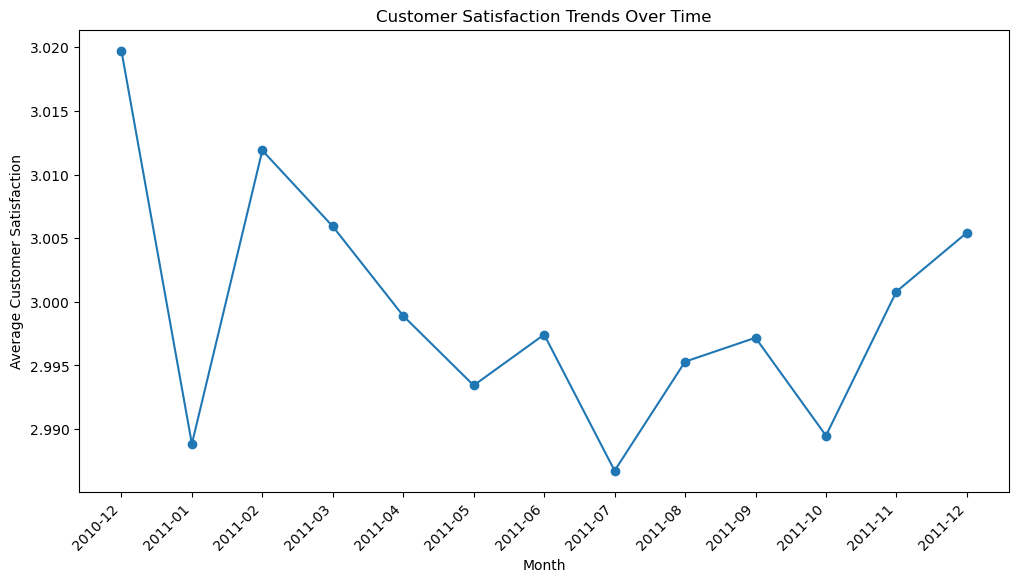

In [ ]:
satisfaction_trends = df.groupby(df['InvoiceDate'].dt.to_period("M"))['Customer Satisfaction'].mean()

plt.figure(figsize=(12, 6))
plt.plot(satisfaction_trends.index.astype(str), satisfaction_trends.values, marker='o')
plt.title('Customer Satisfaction Trends Over Time')
plt.xlabel('Month')
plt.ylabel('Average Customer Satisfaction')
plt.xticks(rotation=45, ha='right')
plt.show()